# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1358 files belonging to 4 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1358 files belonging to 4 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

### Compiling and Training Phase

In [15]:
from tensorflow.keras.optimizers import Adam
# Use the Adam optimizer from tf.keras.optimizers
opt = Adam(learning_rate=0.0001)
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 233s 5s/step - accuracy: 0.4100 - loss: 1.6135 - val_accuracy: 0.7084 - val_loss: 0.8549
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6578 - loss: 0.8154 - val_accuracy: 0.7474 - val_loss: 0.6169
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7224 - loss: 0.6634 - val_accuracy: 0.7592 - val_loss: 0.5268
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7479 - loss: 0.6164 - val_accuracy: 0.7842 - val_loss: 0.4884
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7651 - loss: 0.5368 - val_accuracy: 0.7437 - val_loss: 0.5343
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7345 - loss: 0.5809 - val_accuracy: 0.7953 - val_loss: 0.4286
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7723 - loss: 0.4630 - val_accuracy: 0.7828 - val_loss: 0.4700
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7572 - loss: 0.4852 - val_accuracy: 0.8181 - val_loss

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc*100)

43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8959 - loss: 0.2107
Training accuracy: 90.35345911979675


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc*100)

43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8952 - loss: 0.2030
Validation accuracy: 90.35345911979675


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.48085418343544006,
  0.6936671733856201,
  0.7238585948944092,
  0.7584683299064636,
  0.7673048377037048,
  0.7584683299064636,
  0.7805596590042114,
  0.7731958627700806,
  0.7842415571212769,
  0.8092783689498901,
  0.7908689379692078,
  0.8284241557121277,
  0.8247422575950623,
  0.8350515365600586,
  0.8298969268798828,
  0.8365243077278137,
  0.8541973233222961,
  0.8645066022872925,
  0.8652430176734924,
  0.8689249157905579,
  0.8681885004043579,
  0.876288652420044,
  0.8718703985214233,
  0.8549337387084961,
  0.869661271572113,
  0.8652430176734924,
  0.8726067543029785,
  0.8645066022872925,
  0.8851251602172852,
  0.8667157292366028],
 'loss': [1.2764467000961304,
  0.7243713140487671,
  0.6410923600196838,
  0.5749902129173279,
  0.5282968282699585,
  0.5316405296325684,
  0.4770367443561554,
  0.4595637023448944,
  0.4310963749885559,
  0.4019528329372406,
  0.4227640926837921,
  0.3595091700553894,
  0.3564559817314148,
  0.31547415256500244,
  0.3195704

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

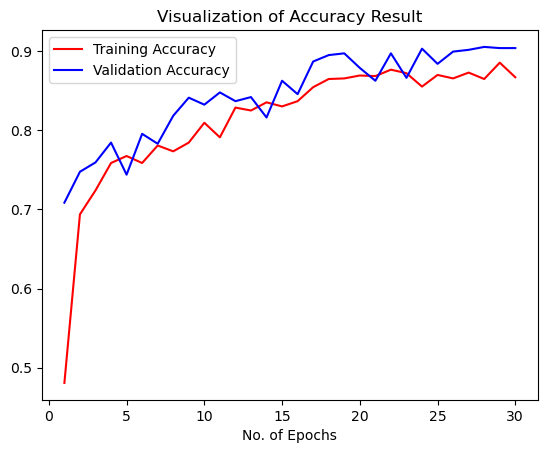

In [26]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [27]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1358 files belonging to 4 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 72ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(1358,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(1358,), dtype=int64, numpy=array([0, 2, 0, ..., 3, 3, 3], dtype=int64)>

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                 precision    recall  f1-score   support

 Powdery Mildew       1.00      0.99      0.99       215
bactrial blight       0.93      0.62      0.74       297
        healthy       0.99      1.00      1.00       604
      leaf spot       0.67      0.95      0.78       242

       accuracy                           0.90      1358
      macro avg       0.90      0.89      0.88      1358
   weighted avg       0.92      0.90      0.90      1358



### Confusion Matrix Visualization

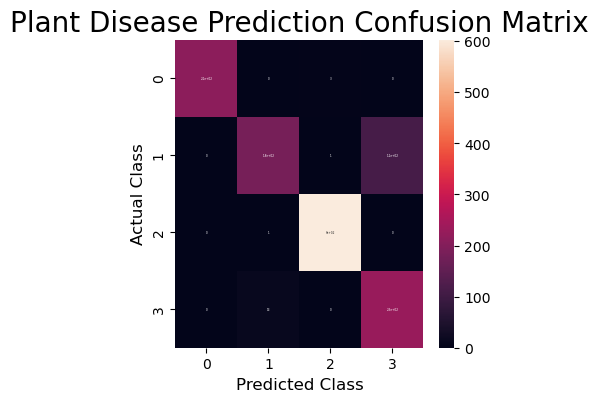

In [35]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm,annot=True,annot_kws={"size": 2})

plt.xlabel('Predicted Class',fontsize = 12)
plt.ylabel('Actual Class',fontsize = 12)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 20)
plt.show()

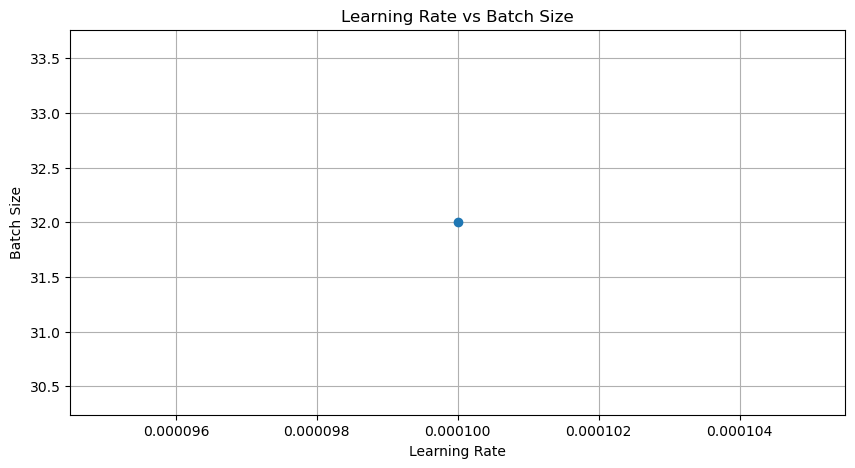

In [46]:
# Learning Rate vs Batch Size
plt.figure(figsize=(10, 5))
plt.plot(0.0001, 32, marker='o')
plt.title('Learning Rate vs Batch Size')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.grid(True)
plt.show()

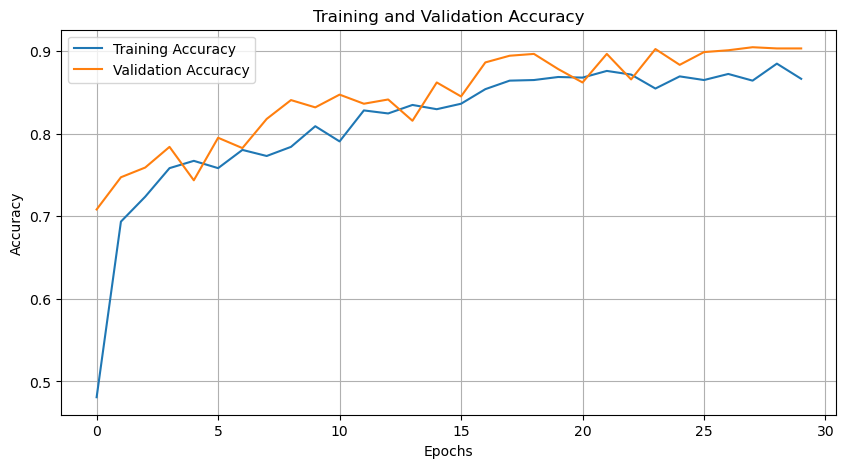

In [43]:
# Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

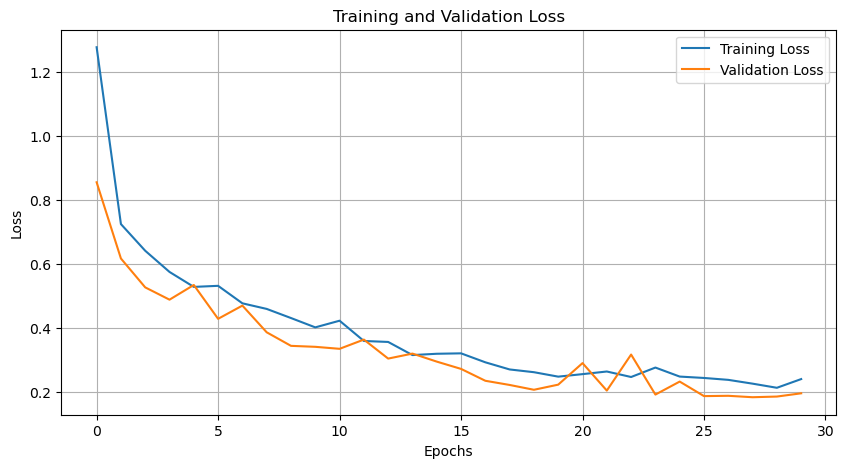

In [42]:
# Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()